# **Linear Regression**

### Cài đặt hồi quy tuyến tính. Hãy đọc dữ liệu tại file sau: advertising.csv. Xây dựng lớp LinearRegression để thực hiện hồi quy tuyến tính từ đầu bằng Gradient Descent.

###
1. Viết một class LinearRegression với các phương thức:

• fit(X, y): Huấn luyện mô hình bằng Gradient Descent.

• predict(X): Dự đoán giá trị y từ X.

• evaluate(X, y): Đánh giá mô hình bằng MSE.

• plot_regression_line(X, y): Vẽ đường hồi quy.

2. Tạo một bộ dữ liệu giả lập.
3. Huấn luyện mô hình và vẽ đường hồi quy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs= epochs
        self.w= None
        self.b= None
    def describe(self):
      print(self.w)
      print(self.b)

    def predict(self,X):
        return np.sum(np.dot(X, self.w))+ self.b

    def evaluate(self, X, y):  #đánh giá MSE: sai số bình phương trung bình. Hàm mất mát phổ biến
        result =0
        for i in range(len(y)):
            result += (y.iloc[i] - self.predict(X.iloc[i]))**2  #.iloc[i]
        return result/len(y)

        #y_pred = self.predict(X)
        #mse = np.mean((y - y_pred)**2)   #MSE: sai số bình phương trung bình. Hàm mất mát phổ biến
        #return mse

    def fit(self, X, y):
        m,n = X.shape
        self.w=np.zeros(n)
        self.b=1
        losses=[]

        for i in range(self.epochs):
            for j in range(m):
                y_pred = self.predict(X.iloc[j])
                dw1=np.array(X.iloc[j])
                dw = (y_pred - y.iloc[j]) * dw1
                db = (y_pred - y.iloc[j])
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

            losses.append(self.evaluate(X, y))
        return losses


    def plot_regression_line(self, X, y):
        plt.scatter(X, y, color="blue", label="Data points")
        y_pred = [self.predict(X.iloc[i]) for i in range(len(X))]
        plt.plot(X, y_pred, color="red", label="Regression line")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()

In [ ]:
dataset=pd.read_csv('advertising.csv')
X=dataset[['TV','Radio','Newspaper']]
y=dataset['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model= LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)
model.describe()

<ipython-input-24-52bab1788a89>:40: RuntimeWarning: overflow encountered in multiply
  dw = (y_pred - y.iloc[j]) * dw1
<ipython-input-24-52bab1788a89>:42: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * dw


KeyboardInterrupt: 

# **WAY1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
    def describe(self):
      print(self.w)
      print(self.b)
    def predict(self, X):
      return np.sum(np.dot(X, self.w)) + self.b

    def evaluate(self, X, y):
      result = 0
      for i in range(len(y)):
        result += (self.predict(X.iloc[i]) - y.iloc[i])**2
      return result/len(y)

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 1
        losses = []

        for i in range(self.epochs):
          # self.describe()
          for j in range(m):
            y_pred = self.predict(X.iloc[j])
            dw = np.array(X.iloc[j])
            dw = (y_pred - y.iloc[j]) * dw
            db = y_pred - y.iloc[j]
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
          losses.append(self.evaluate(X, y))
        return losses

    def plot_regression_line(self, X, y):
        plt.scatter(X, y, color="blue", label="Data points")
        y_pred = [self.predict(X.iloc[i]) for i in range(len(X))]
        plt.plot(X, y_pred, color="red", label="Regression line")
        # print(y_pred)
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()
    def plot_regression_line_in_3D(self, X, y):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color="red", label="Regression line")
        ax.scatter(X['TV'], X['Radio'], X['Newspaper'], c=y, cmap='viridis')
        ax.set_xlabel('TV')
        ax.set_ylabel('Radio')
        ax.set_zlabel('Newspaper')
        plt.legend()
        plt.show()
    def plot_loss(self, loss):
        plt.plot(loss)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()


In [ ]:
# Load data chia tỷ lệ: Train 80% và Test 20%
dataset = pd.read_csv('advertising.csv')
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Huấn luyện mô hình
model = LinearRegression(learning_rate=0.00001, epochs=1000)
loss = model.fit(X_train, y_train)
# model.describe()




MSE: 4.335158187432422


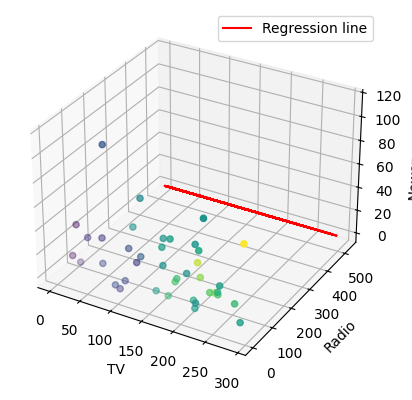

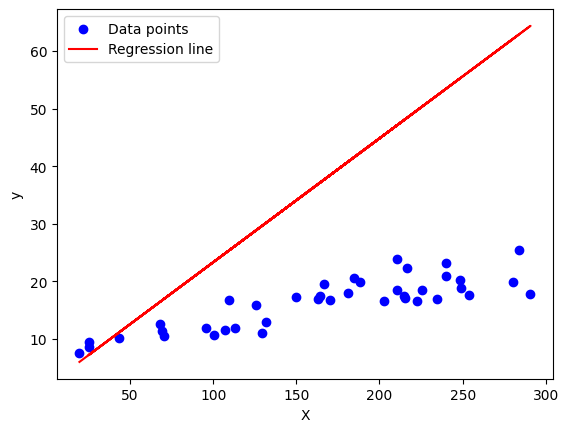

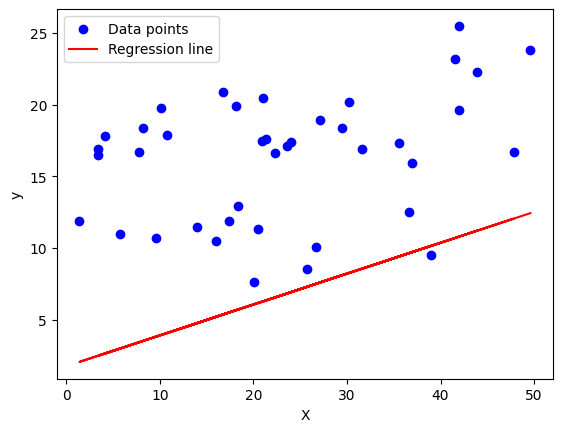

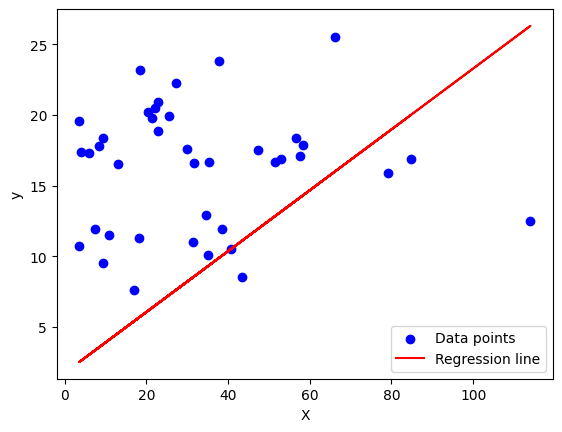

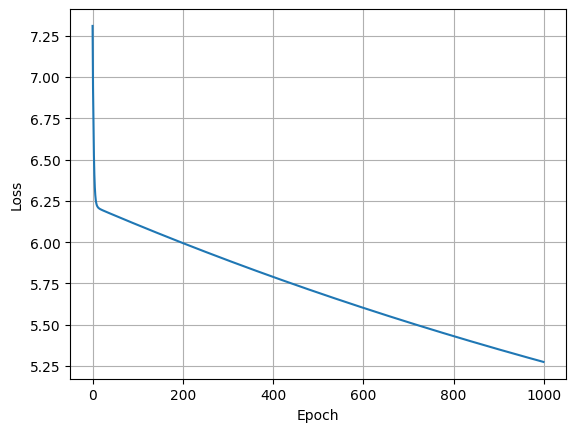

In [ ]:
# Dự đoán và vẽ đường hồi quy
print(f"MSE: {model.evaluate(X_test, y_test)}")
model.plot_regression_line_in_3D(X_test, y_test)
model.plot_regression_line(X_test['TV'], y_test)
model.plot_regression_line(X_test['Radio'], y_test)
model.plot_regression_line(X_test['Newspaper'], y_test)
model.plot_loss(loss)

# **WAY2**

Epoch 0 : cost = 113.725475
Epoch 50 : cost = 42.270986984848356
Epoch 100 : cost = 16.301089047300188
Epoch 150 : cost = 6.828957870761153
Epoch 200 : cost = 3.3642986207993797
Epoch 250 : cost = 2.093828606767359
Epoch 300 : cost = 1.626788552791002
Epoch 350 : cost = 1.4546176763799286
Epoch 400 : cost = 1.390929873012838
Epoch 450 : cost = 1.3672659568117587
Epoch 500 : cost = 1.3584210332209725
Epoch 550 : cost = 1.3550886004010865
Epoch 600 : cost = 1.3538196481248657
Epoch 650 : cost = 1.3533296560388843
Epoch 700 : cost = 1.3531370424223292
Epoch 750 : cost = 1.3530596370712467
Epoch 800 : cost = 1.353027706724913
Epoch 850 : cost = 1.3530141424027013
Epoch 900 : cost = 1.3530081975956834
Epoch 950 : cost = 1.35300550978008


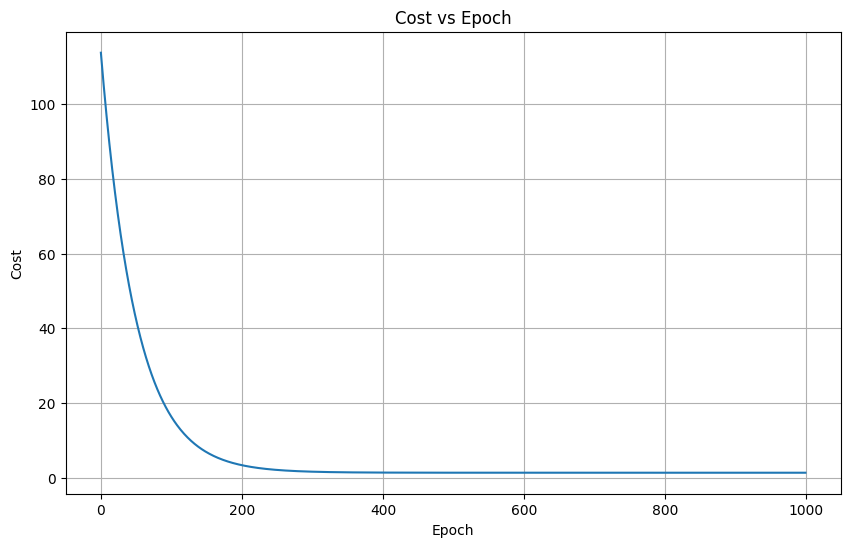

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

data_advertising = pd.read_csv('advertising.csv')

epoch_max = 1000
lr = 0.01

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_data = data_advertising.drop(['Sales'], axis=1)
Y_data = data_advertising['Sales']

X_data = scaler.fit_transform(X_data)


def predict(x,w,b):
    return np.dot(x, w) +b

def gradient(y_hat, y, x):
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))

    return (dw, db, cost)

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)


w = np.zeros(X_data.shape[1])
b = 1
costs = []
for epoch in range(epoch_max):
  y_hat = predict(X_data, w, b)
  (dw, db, cost) = gradient(y_hat, Y_data, X_data)
  costs.append(cost)
  if(epoch % 50 == 0):
    print(f'Epoch {epoch} : cost = {cost}')
  (w, b) = update_weight(w, b, lr, dw, db)


plt.figure(figsize=(10,6))
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.show()

# **WAY2** 2

Epoch 0 : cost = 113.725475
Epoch 50 : cost = 42.270986984848356
Epoch 100 : cost = 16.301089047300188
Epoch 150 : cost = 6.828957870761153
Epoch 200 : cost = 3.3642986207993797
Epoch 250 : cost = 2.093828606767359
Epoch 300 : cost = 1.626788552791002
Epoch 350 : cost = 1.4546176763799286
Epoch 400 : cost = 1.390929873012838
Epoch 450 : cost = 1.3672659568117587
Epoch 500 : cost = 1.3584210332209725
Epoch 550 : cost = 1.3550886004010865
Epoch 600 : cost = 1.3538196481248657
Epoch 650 : cost = 1.3533296560388843
Epoch 700 : cost = 1.3531370424223292
Epoch 750 : cost = 1.3530596370712467
Epoch 800 : cost = 1.353027706724913
Epoch 850 : cost = 1.3530141424027013
Epoch 900 : cost = 1.3530081975956834
Epoch 950 : cost = 1.35300550978008


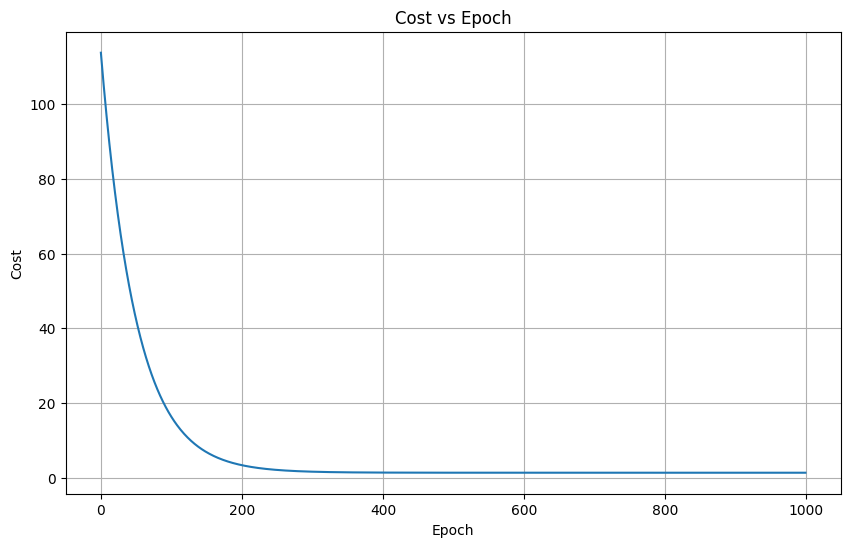

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.costs = []

    def predict(self, x):
        return np.dot(x, self.w) + self.b

    def gradient(self, y_hat, y, x):
        loss = y_hat - y
        dw = x.T.dot(loss)/len(y)
        db = np.sum(loss)/len(y)
        cost = np.sum(loss**2)/(2*len(y))
        return dw, db, cost

    def update_weights(self, dw, db):
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

    def fit(self, X, y):
        # Initialize weights
        self.w = np.zeros(X.shape[1])
        self.b = 1
        self.costs = []

        # Training loop
        for epoch in range(self.epochs):
            y_hat = self.predict(X)
            dw, db, cost = self.gradient(y_hat, y, X)
            self.costs.append(cost)

            if epoch % 50 == 0:
                print(f'Epoch {epoch} : cost = {cost}')

            self.update_weights(dw, db)

    def plot_cost(self):
        plt.figure(figsize=(10,6))
        plt.plot(self.costs)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.title('Cost vs Epoch')
        plt.grid(True)
        plt.show()

# Example usage:
model = LinearRegression(learning_rate=lr, epochs=epoch_max)
model.fit(X_data, Y_data)
model.plot_cost()

# **DEEPSEEK**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y_pred - y) ** 2)
        return mse

    def plot_regression_line(self, X, y):
        plt.scatter(X, y, color="blue", label="Data points")
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color="red", label="Regression line")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
data = pd.read_csv('advertising.csv')

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MSE: nan


<ipython-input-33-c8a8ced4fcc4>:20: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * dw


ValueError: shapes (40,) and (3,) not aligned: 40 (dim 0) != 3 (dim 0)

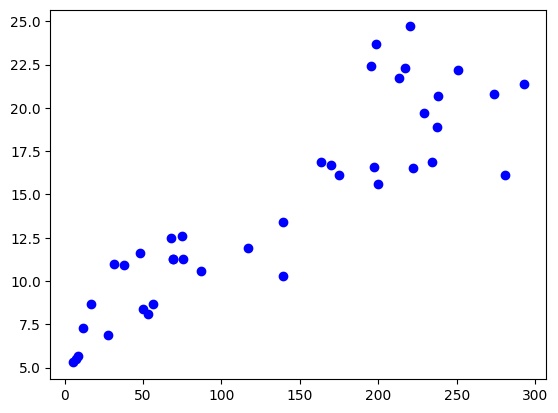

In [ ]:
# Huấn luyện mô hình
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
print(f"MSE: {model.evaluate(X_test, y_test)}")

# Vẽ đường hồi quy (chỉ vẽ cho một biến đầu vào để dễ hình dung)
# Ví dụ: Vẽ đường hồi quy cho biến 'TV'
model.plot_regression_line(X_test[:, 0], y_test)